# Import libraries


In [48]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
#from datasist.structdata import detect_outliers
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn . feature_selection import SequentialFeatureSelector
from sklearn . pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Reading data

In [123]:
df=pd.read_csv("projectdata.xlsx - sheet 1.csv",encoding='utf-8')

In [124]:
df.head()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,33,16.0,20.0,2021-10-29T03:33:52Z,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23T12:29:27Z,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North


## Geting Info

In [125]:
df.info() #To get shape & columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2995 non-null   int64  
 1   UnitePrice    2995 non-null   float64
 2   discount      2995 non-null   float64
 3   date          2995 non-null   object 
 4   retail price  2995 non-null   float64
 5   product_name  2995 non-null   object 
 6   area          2970 non-null   object 
 7   city          2995 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 187.3+ KB


## Checking_Null

In [126]:
df.isnull().sum()

quantity         0
UnitePrice       0
discount         0
date             0
retail price     0
product_name     0
area            25
city             0
dtype: int64

Area has 25 null_value

In [127]:
df.isnull().mean()*100

quantity        0.000000
UnitePrice      0.000000
discount        0.000000
date            0.000000
retail price    0.000000
product_name    0.000000
area            0.834725
city            0.000000
dtype: float64

null values in Area are less than 1% of the entier column

### Area

In [128]:
df['area'].unique().tolist()
indesies=df[df['area'].isna()| df['area'].isin(['Ø¹Ø¬Ù„ÙˆÙ†'])].index
print("No. of index to drop" , len(indesies))
print("lenght of df",df.shape[0])
#df.drop(indesies , inplace=True , )
#df.reset_index(inplace=True, drop=True)
#df

No. of index to drop 28
lenght of df 2995


## Describe

In [129]:
df.describe()

,quantity,UnitePrice,discount,retail price
count,2995.000000,2995.000000,2995.000000,2995.000000
mean,7.705509,60.555426,25.917225,59.615776
std,100.466019,35.270286,14.124298,36.944778
min,1.000000,10.000000,-1.000000,0.000000
25%,2.000000,16.000000,20.000000,16.000000
50%,3.000000,45.000000,31.000000,45.000000
75%,5.000000,99.000000,33.000000,99.000000
max,5000.000000,102.000000,561.000000,102.000000


#Let check quantity , discount , retail price


### retail price


In [130]:
df[df['retail price']==0]

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
73,1,99.0,29.0,2022-09-03T13:33:20Z,0.0,product x,El-Seyouf,North
87,3,16.0,7.0,2022-11-16T10:10:46Z,0.0,product y,El-Seyouf,North
93,1,99.0,33.0,2022-12-15T11:37:22Z,0.0,product x,El-Seyouf,North
97,2,45.0,31.0,2022-12-23T20:14:41Z,0.0,product z,El-Seyouf,North
98,1,22.0,21.0,2023-01-02T07:54:06Z,0.0,product y,El-Seyouf,North
...,...,...,...,...,...,...,...,...
2951,5,22.0,19.0,2022-12-24T09:09:25Z,0.0,product y,Kafr El-Dawar City,North
2957,1,99.0,30.0,2022-08-13T09:13:26Z,0.0,product x,El-Ibrahimia,North
2958,3,16.0,10.0,2022-08-16T11:57:59Z,0.0,product y,El-Ibrahimia,North
2993,1,99.0,32.0,2022-11-26T09:16:45Z,0.0,product x,El-Agamy,North


In [131]:
df[df['retail price']==11][['UnitePrice', 'retail price']]

,UnitePrice,retail price
22,89.75,11.0
24,99.00,11.0
29,99.00,11.0
32,99.00,11.0
1371,99.00,11.0
1372,99.00,11.0
1378,99.00,11.0
2357,99.00,11.0
2600,89.75,11.0
2601,99.00,11.0


In [132]:
def hande_zero_retail_price(retailprice , UnitePrice):
    if(retailprice-UnitePrice)<0:
        return UnitePrice
    else:
        return retailprice
    
df['retail price']=df.apply(lambda row : hande_zero_retail_price(row['retail price'], row['UnitePrice']) , axis=1)
df[['retail price']].describe()

,retail price
count,2995.000000
mean,61.783306
std,36.087630
min,16.000000
25%,16.000000
50%,45.000000
75%,99.000000
max,102.000000


### Discount

In [133]:
df[['discount']].describe()

,discount
count,2995.000000
mean,25.917225
std,14.124298
min,-1.000000
25%,20.000000
50%,31.000000
75%,33.000000
max,561.000000


<Axes: xlabel='discount'>

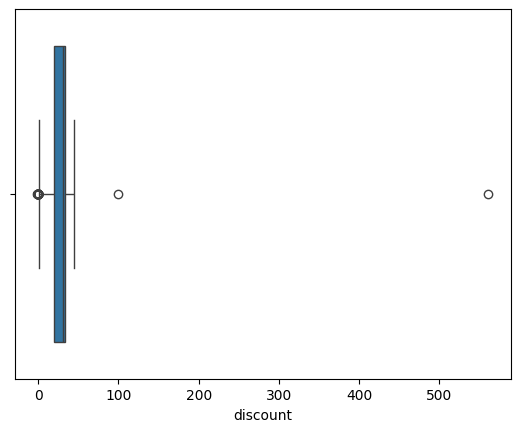

In [134]:
sns.boxplot(data=df , x='discount')

min discount is -1 & max discount is 561

In [135]:
df[df['discount'].isin([-1 , 100,561])]

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
603,1,16.00,100.0,2022-04-26T15:18:36Z,16.0,product y,Mahatet El-Raml,North
927,2,16.00,-1.0,2022-02-22T12:25:53Z,16.0,product y,El-Seyouf,North
1415,5,89.75,561.0,2022-06-21T14:52:02Z,99.0,product x,El-Mandara,North


In [136]:
df.groupby(['product_name']).agg({'discount':'median' }).reset_index()

,product_name,discount
0,product x,33.0
1,product y,11.0
2,product z,30.0


In [137]:
df.loc[[927,603] , 'discount']=11.0
df.loc[1415 , 'discount']=33.0
df.loc[[927,603 , 1415]]

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
927,2,16.00,11.0,2022-02-22T12:25:53Z,16.0,product y,El-Seyouf,North
603,1,16.00,11.0,2022-04-26T15:18:36Z,16.0,product y,Mahatet El-Raml,North
1415,5,89.75,33.0,2022-06-21T14:52:02Z,99.0,product x,El-Mandara,North


In [138]:
df[['discount']].describe()

,discount
count,2995.000000
mean,25.715222
std,10.095354
min,0.000000
25%,20.000000
50%,31.000000
75%,33.000000
max,45.000000


<Axes: xlabel='discount'>

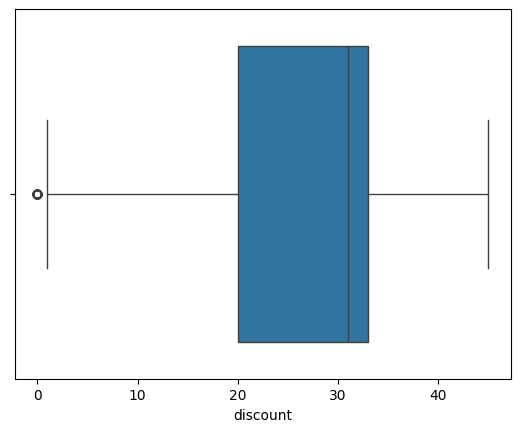

In [139]:
sns.boxplot(data=df , x='discount')


### Quantity

In [140]:
df[['quantity']].describe()

,quantity
count,2995.000000
mean,7.705509
std,100.466019
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5000.000000


<Axes: xlabel='quantity'>

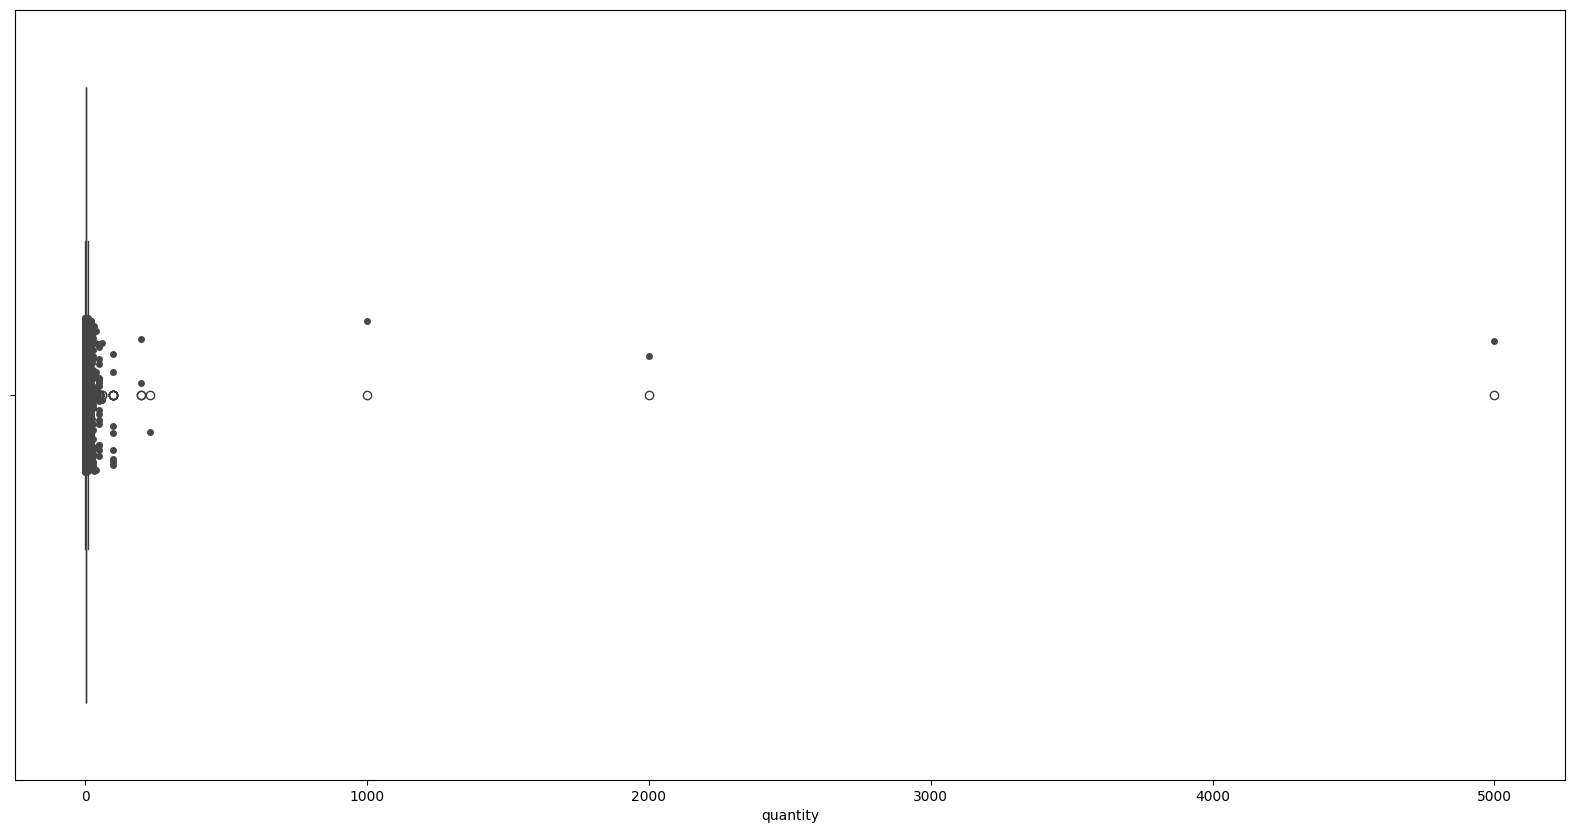

In [141]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df , x='quantity')
sns.stripplot(x='quantity', data=df, color="#474646")

In [142]:
df.groupby(['product_name']).agg({'retail price':'median' }).reset_index()

,product_name,retail price
0,product x,99.0
1,product y,16.0
2,product z,45.0


In [143]:
df[df['quantity']>=100]

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
18,2000,16.00,20.0,2022-03-07T07:25:34Z,16.00,product y,Nasr City,Cairo
40,100,89.75,33.0,2022-03-15T12:50:07Z,89.75,product x,El-Mandara,North
263,100,102.00,37.0,2021-10-20T10:05:19Z,102.00,product x,Heliopolis,Cairo
267,100,16.00,10.0,2022-11-12T14:38:07Z,16.00,product y,Nasr City,Cairo
300,1000,16.00,20.0,2022-01-06T09:20:30Z,16.00,product y,El-Maadi,Cairo
501,5000,16.00,1.0,2022-02-06T13:47:49Z,16.00,product y,El-Haram,Giza
1724,200,16.00,20.0,2022-09-20T12:02:35Z,16.00,product y,El-Seyouf,North
1979,100,16.00,21.0,2022-10-21T22:14:36Z,16.00,product y,New Cairo,Cairo
2191,100,99.00,36.0,2022-11-02T11:10:12Z,99.00,product x,Nasr City,Cairo
2205,100,89.75,32.0,2022-06-20T15:19:40Z,99.00,product x,El-Haram,Giza


In [144]:
df.drop(df[df['quantity']>=20].index, inplace=True)
df.reset_index(drop=True , inplace=True)
df

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
1,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
2,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North
3,1,102.0,35.0,2021-09-06T19:57:11Z,102.0,product x,Miamy,North
4,2,45.0,20.0,2021-09-07T23:41:54Z,45.0,product z,Miamy,North
...,...,...,...,...,...,...,...,...
2847,2,99.0,33.0,2022-12-05T09:48:42Z,99.0,product x,Dokki and Mohandessin,Giza
2848,2,99.0,33.0,2022-12-21T00:00:28Z,99.0,product x,Dokki and Mohandessin,Giza
2849,5,45.0,31.0,2022-12-27T08:43:38Z,45.0,product z,Dokki and Mohandessin,Giza
2850,1,99.0,32.0,2022-11-26T09:16:45Z,99.0,product x,El-Agamy,North


<Axes: xlabel='quantity'>

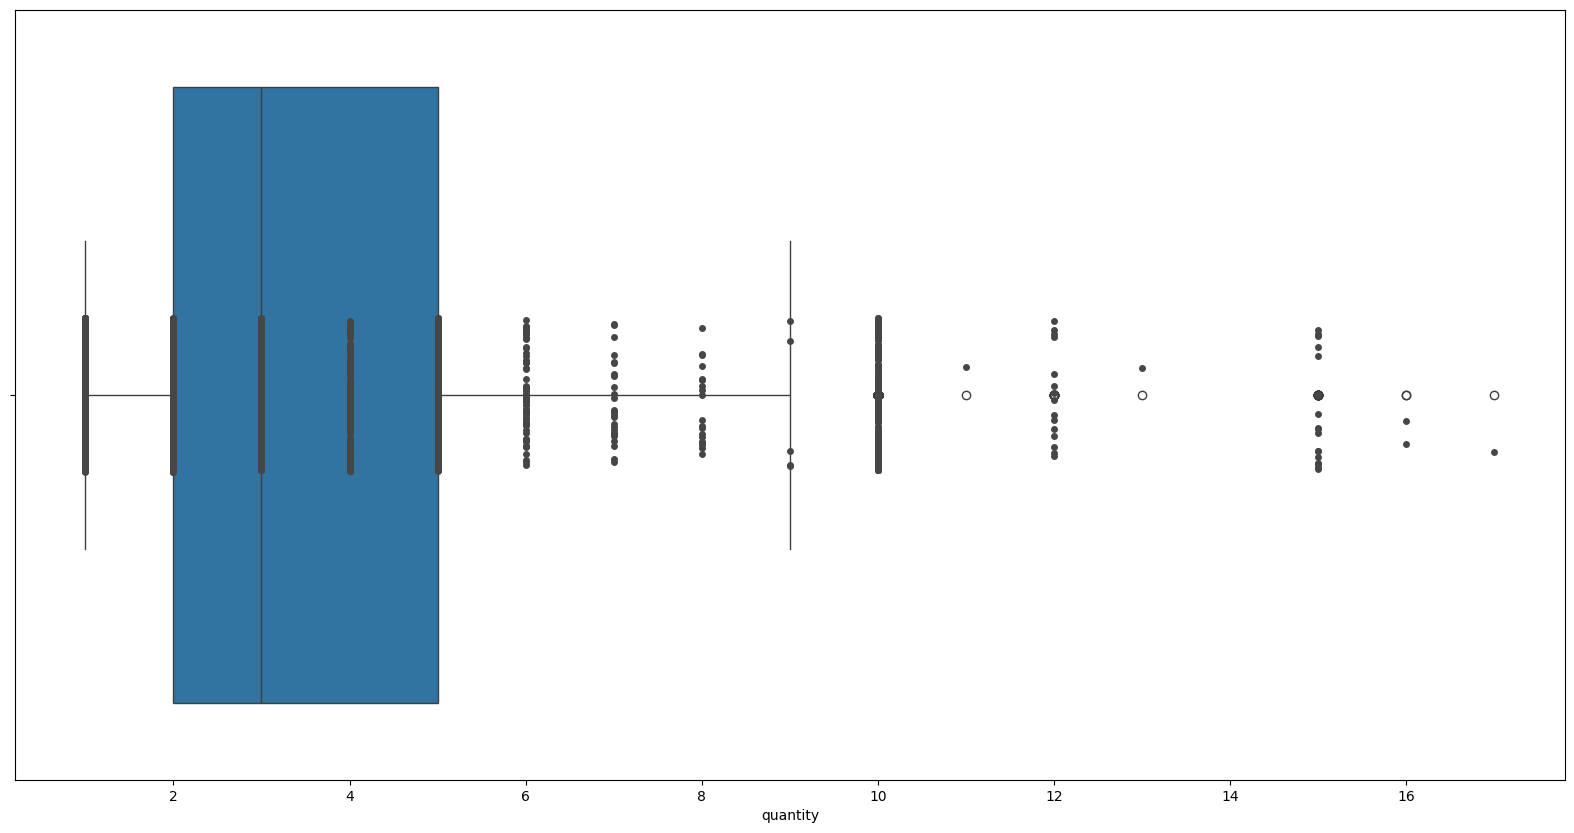

In [145]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df , x='quantity')
sns.stripplot(x='quantity', data=df, color="#474646")

df['Date_modified']=pd.to_datetime(df['date'])
df= df.set_index("Date_modified")

# Visualize the data with the outlier
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['quantity'])
plt.xlabel('Date_modified')
plt.ylabel('quantity')
plt.title('Time Series with Outlier')
plt.show()

# Identify and handle the outlier using interpolation
outlier_indicies = df[df['quantity']>=10].index # Find the index of the outlier
df.loc[outlier_indicies] = np.nan  # Replace the outlier with NaN

df['quantity'].interpolate(method='linear', inplace=True)#time 

# Visualize the data after handling the outlier
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['quantity'])
plt.xlabel('Date_modified')
plt.ylabel('Value')
plt.title('Time Series after Handling Outlier')
plt.show()

### Convert date column from object to datatime datatype

In [146]:
df['Date_modified']=pd.to_datetime(df['date'])

In [147]:
#df.sort_values(by=['product_name', 'city','Date_modified'], inplace=True)

## Featuer Engineering 

In [148]:
#Time based features
df['Year']=df['Date_modified'].dt.year
df['Quarter'] = df['Date_modified'].dt.quarter
#df['month']=df['Date_modified'].dt.month_name()
df['month'] = df['Date_modified'].dt.strftime('%b')
df['Week']=df['Date_modified'].dt.isocalendar().week
df['Day']=df['Date_modified'].dt.day_name()




In [149]:
df.describe()

,quantity,UnitePrice,discount,retail price,Year,Quarter,Week
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.0
mean,3.455119,61.714411,25.923769,62.915849,2022.032609,2.990533,32.514727
std,2.718995,34.975268,10.107648,35.768809,0.303127,1.071087,14.572866
min,1.000000,10.000000,0.000000,16.000000,2021.000000,1.000000,1.0
25%,2.000000,16.000000,20.000000,22.000000,2022.000000,2.000000,21.0
50%,3.000000,45.000000,31.000000,45.000000,2022.000000,3.000000,37.0
75%,5.000000,99.000000,33.000000,99.000000,2022.000000,4.000000,44.0
max,17.000000,102.000000,38.000000,102.000000,2023.000000,4.000000,52.0


### Sales

In [150]:
# Total sales
df['sales']=(df['quantity']*df['retail price']) -(df['quantity']*df['retail price']*(df['discount']/100))


In [151]:
df[['sales']].describe()

,sales
count,2852.000000
mean,137.951090
std,136.020544
min,12.800000
25%,63.360000
50%,91.800000
75%,160.000000
max,1054.350000


<Axes: xlabel='sales'>

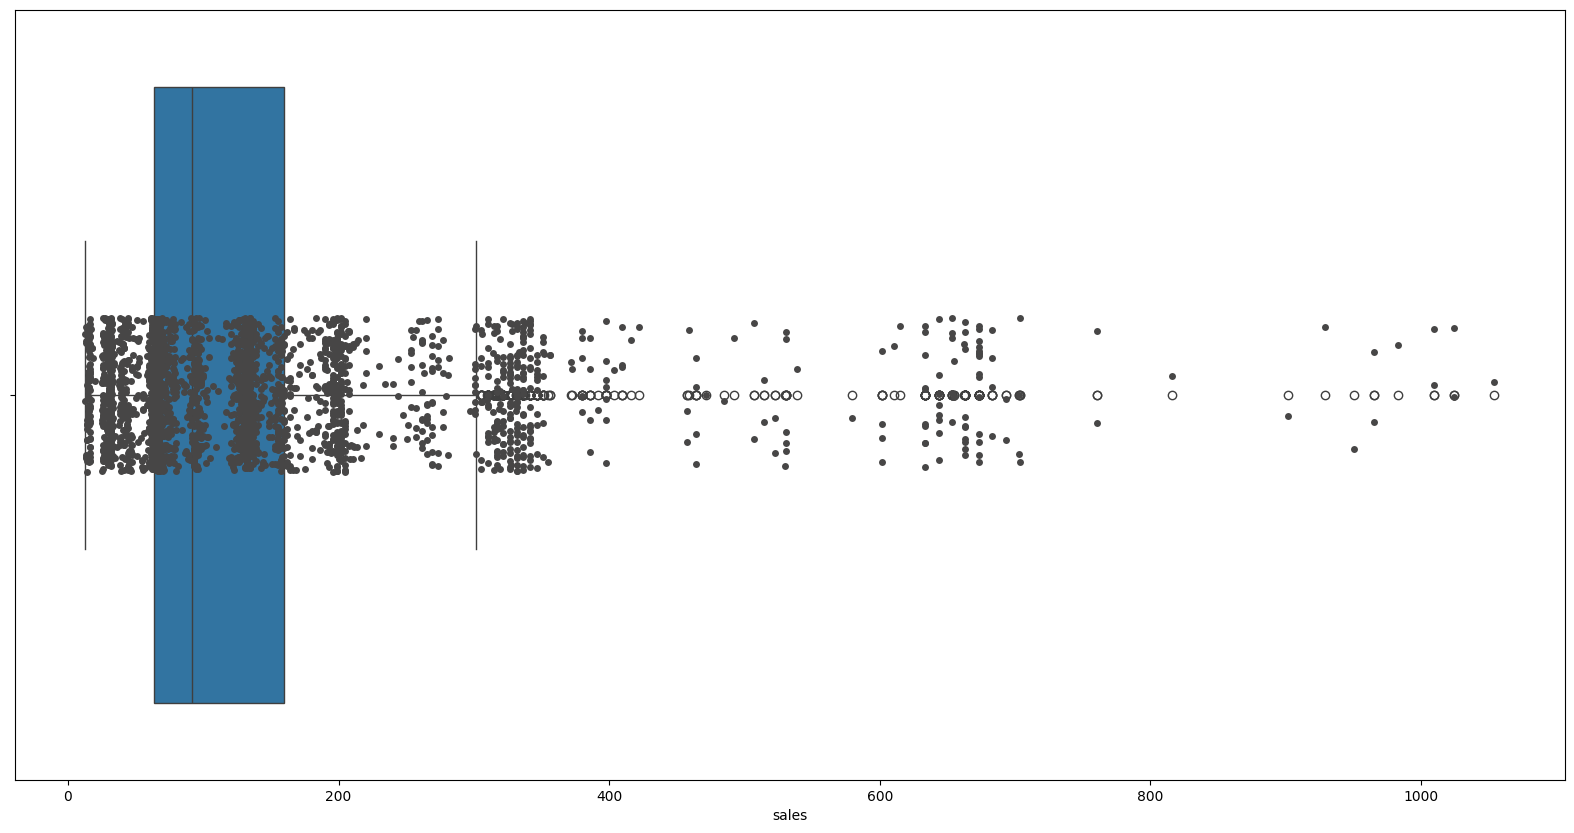

In [152]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df , x='sales')
sns.stripplot(x='sales', data=df, color="#474646")

<Axes: xlabel='sales', ylabel='Density'>

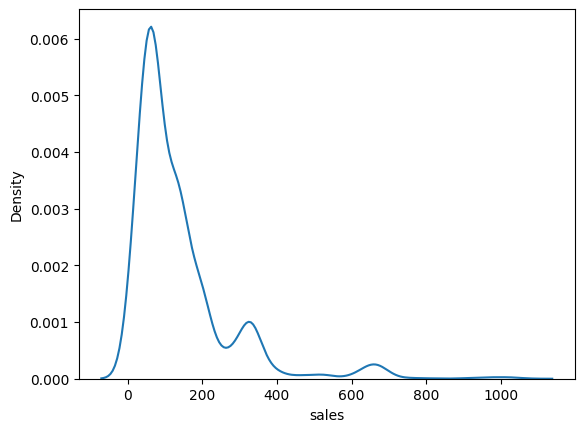

In [153]:
sns.kdeplot(data=df , x='sales')

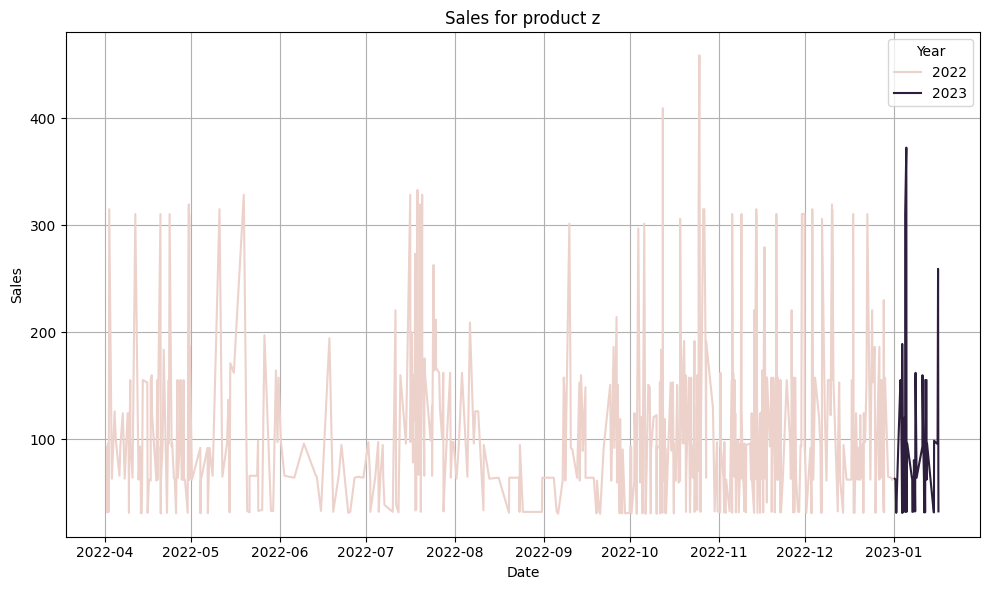

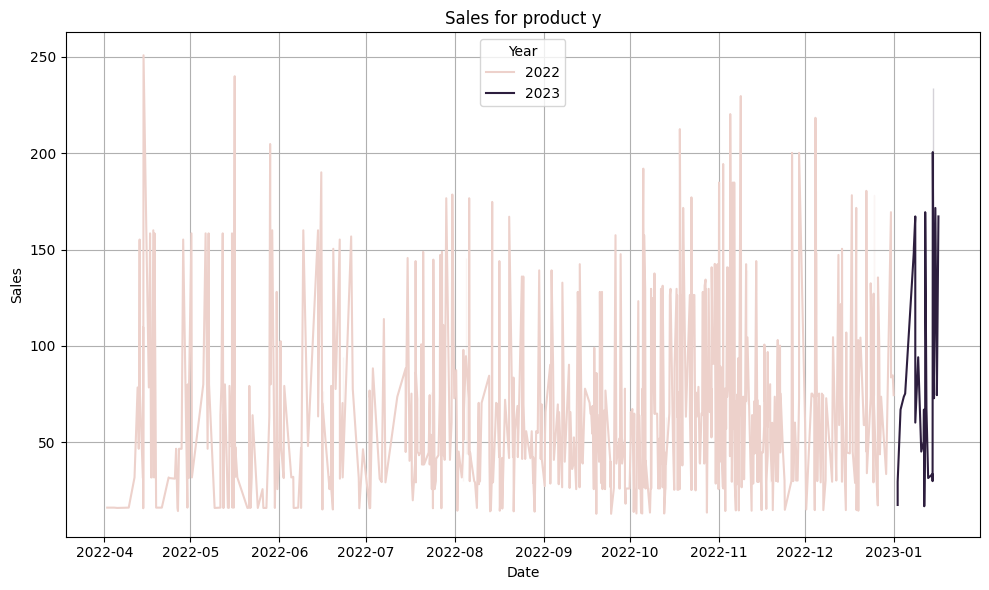

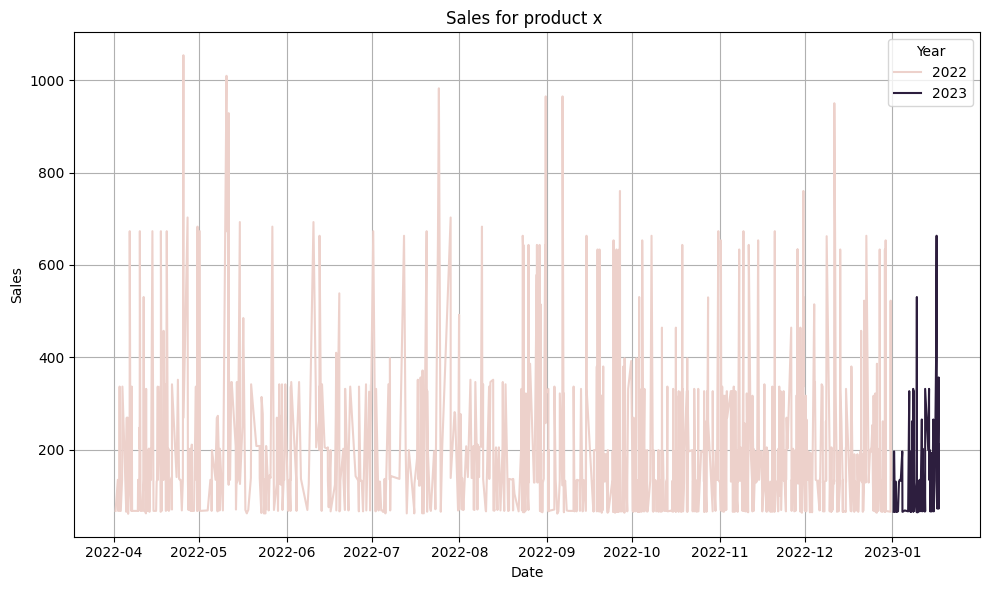

In [154]:
mask = (df['date'] >= '2022-04-01') & (df['date'] <= '2023-12-31') #2022-04-01''2021-03-31'
DF = df[mask]
for product_name in df['product_name'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=DF[DF['product_name'] == product_name], x='Date_modified', y='sales', hue='Year')
    plt.title(f'Sales for {product_name}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [155]:
df_1=df.set_index('Date_modified')
df_1['wom'] = df_1.index.day // 7 + 1

In [156]:
# Extract the date part
df['Date_only'] = df['Date_modified'].dt.date
df

,quantity,UnitePrice,discount,date,retail price,product_name,area,city,Date_modified,Year,Quarter,month,Week,Day,sales,Date_only
0,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North,2021-08-03 09:14:16+00:00,2021,3,Aug,31,Tuesday,63.00,2021-08-03
1,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North,2021-08-17 09:00:50+00:00,2021,3,Aug,33,Tuesday,46.56,2021-08-17
2,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North,2021-09-06 19:57:02+00:00,2021,3,Sep,36,Monday,32.85,2021-09-06
3,1,102.0,35.0,2021-09-06T19:57:11Z,102.0,product x,Miamy,North,2021-09-06 19:57:11+00:00,2021,3,Sep,36,Monday,66.30,2021-09-06
4,2,45.0,20.0,2021-09-07T23:41:54Z,45.0,product z,Miamy,North,2021-09-07 23:41:54+00:00,2021,3,Sep,36,Tuesday,72.00,2021-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2,99.0,33.0,2022-12-05T09:48:42Z,99.0,product x,Dokki and Mohandessin,Giza,2022-12-05 09:48:42+00:00,2022,4,Dec,49,Monday,132.66,2022-12-05
2848,2,99.0,33.0,2022-12-21T00:00:28Z,99.0,product x,Dokki and Mohandessin,Giza,2022-12-21 00:00:28+00:00,2022,4,Dec,51,Wednesday,132.66,2022-12-21
2849,5,45.0,31.0,2022-12-27T08:43:38Z,45.0,product z,Dokki and Mohandessin,Giza,2022-12-27 08:43:38+00:00,2022,4,Dec,52,Tuesday,155.25,2022-12-27
2850,1,99.0,32.0,2022-11-26T09:16:45Z,99.0,product x,El-Agamy,North,2022-11-26 09:16:45+00:00,2022,4,Nov,47,Saturday,67.32,2022-11-26


In [157]:
df.drop(['quantity', 'UnitePrice', 'discount', 'date', 'retail price', 'area', 'Date_modified'] , axis=1  , inplace=True)

In [158]:
df

,product_name,city,Year,Quarter,month,Week,Day,sales,Date_only
0,product z,North,2021,3,Aug,31,Tuesday,63.00,2021-08-03
1,product y,North,2021,3,Aug,33,Tuesday,46.56,2021-08-17
2,product z,North,2021,3,Sep,36,Monday,32.85,2021-09-06
3,product x,North,2021,3,Sep,36,Monday,66.30,2021-09-06
4,product z,North,2021,3,Sep,36,Tuesday,72.00,2021-09-07
...,...,...,...,...,...,...,...,...,...
2847,product x,Giza,2022,4,Dec,49,Monday,132.66,2022-12-05
2848,product x,Giza,2022,4,Dec,51,Wednesday,132.66,2022-12-21
2849,product z,Giza,2022,4,Dec,52,Tuesday,155.25,2022-12-27
2850,product x,North,2022,4,Nov,47,Saturday,67.32,2022-11-26


In [168]:
Sales_data=df.groupby(['product_name', 'city', 'Date_only']).agg({'sales': 'sum'})
Sales_data.reset_index(inplace=True)
Sales_data

,product_name,city,Date_only,sales
0,product x,Cairo,2021-03-31,341.70
1,product x,Cairo,2021-08-02,136.68
2,product x,Cairo,2021-08-19,201.96
3,product x,Cairo,2021-10-11,816.00
4,product x,Cairo,2021-12-15,205.02
...,...,...,...,...
1462,product z,North,2023-01-08,590.15
1463,product z,North,2023-01-11,534.60
1464,product z,North,2023-01-12,217.35
1465,product z,North,2023-01-14,31.50


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  2852 non-null   object 
 1   city          2852 non-null   object 
 2   Year          2852 non-null   int32  
 3   Quarter       2852 non-null   int32  
 4   month         2852 non-null   object 
 5   Week          2852 non-null   UInt32 
 6   Day           2852 non-null   object 
 7   sales         2852 non-null   float64
 8   Date_only     2852 non-null   object 
dtypes: UInt32(1), float64(1), int32(2), object(5)
memory usage: 170.0+ KB


<Axes: xlabel='Date_only'>

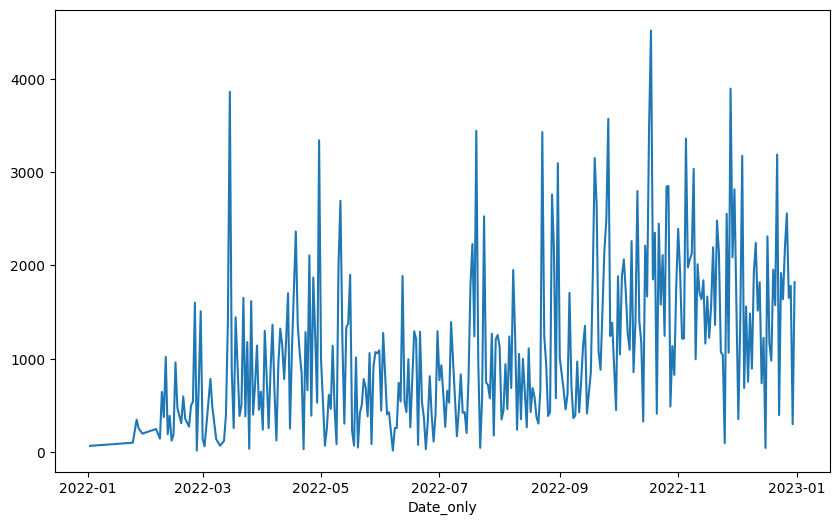

In [166]:
total_sales_per_date = df[df['Year']==2022].groupby(["Date_only"])["sales"].aggregate("sum")
plt.figure(figsize=(10, 6))
total_sales_per_date.plot()


In [169]:
# Set Date_modified as index
Sales_data.set_index('Date_only', inplace=True)

# Create a complete date range for each product and city
date_range = pd.date_range(start=Sales_data.index.min(), end=Sales_data.index.max())

# Reindex the DataFrame to include all dates in the range
Sales_data_reindex = Sales_data.groupby(['product_name', 'city']).apply(lambda x: x.reindex(date_range)).drop(columns=['product_name', 'city'])
#fill the missing sales values with 0 
Sales_data_reindex["sales_fwz"] = Sales_data_reindex["sales"].fillna(0)
# Forward fill the missing sales values
Sales_data_reindex['sales_ff'] = Sales_data_reindex['sales'].fillna(method='ffill')
# interpolataing the missing sales values 
Sales_data_reindex['sales_interpo'] = Sales_data_reindex['sales'].interpolate(method='linear')


Sales_data_reindex.reset_index(inplace=True)
Sales_data_reindex.rename(columns={'index': 'Date'}, inplace=True)

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1690941826.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Sales_data_reindex = Sales_data.groupby(['product_name', 'city']).apply(lambda x: x.reindex(date_range)).drop(columns=['product_name', 'city'])
C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1690941826.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Sales_data_reindex['sales_ff'] = Sales_data_reindex['sales'].fillna(method='ffill')


In [170]:
Sales_data_reindex

,product_name,city,level_2,sales,sales_fwz,sales_ff,sales_interpo
0,product x,Cairo,2021-03-31,341.7,341.7,341.70,341.700000
1,product x,Cairo,2021-04-01,NaN,0.0,341.70,340.046613
2,product x,Cairo,2021-04-02,NaN,0.0,341.70,338.393226
3,product x,Cairo,2021-04-03,NaN,0.0,341.70,336.739839
4,product x,Cairo,2021-04-04,NaN,0.0,341.70,335.086452
...,...,...,...,...,...,...,...
5917,product z,North,2023-01-13,NaN,0.0,217.35,124.425000
5918,product z,North,2023-01-14,31.5,31.5,31.50,31.500000
5919,product z,North,2023-01-15,NaN,0.0,31.50,193.500000
5920,product z,North,2023-01-16,355.5,355.5,355.50,355.500000


In [174]:
Sales_data_reindex.columns

Index(['product_name', 'city', 'level_2', 'sales', 'sales_fwz', 'sales_ff',
       'sales_interpo'],
      dtype='object')

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1374355397.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_fwz')


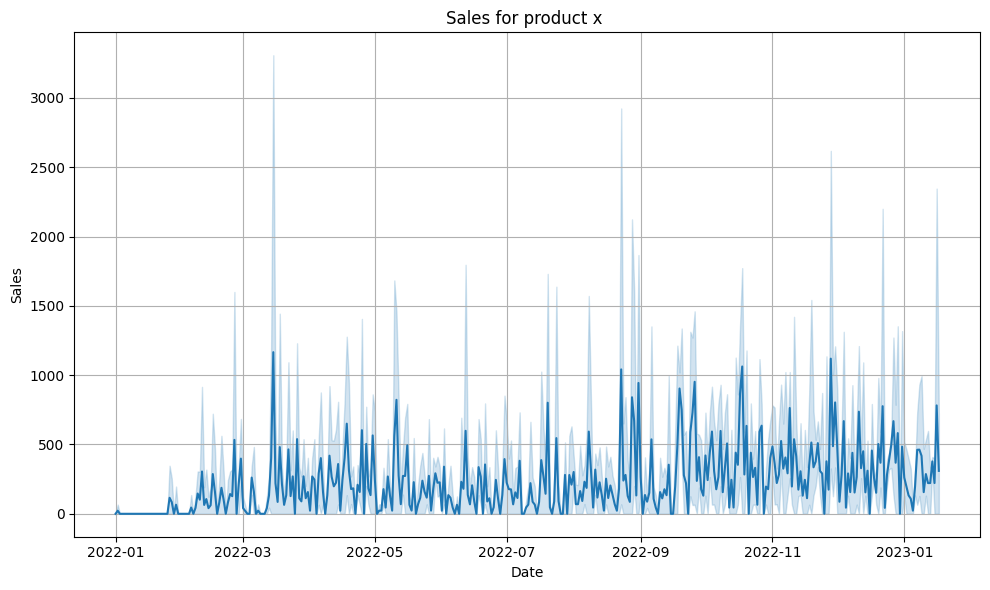

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1374355397.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_fwz')


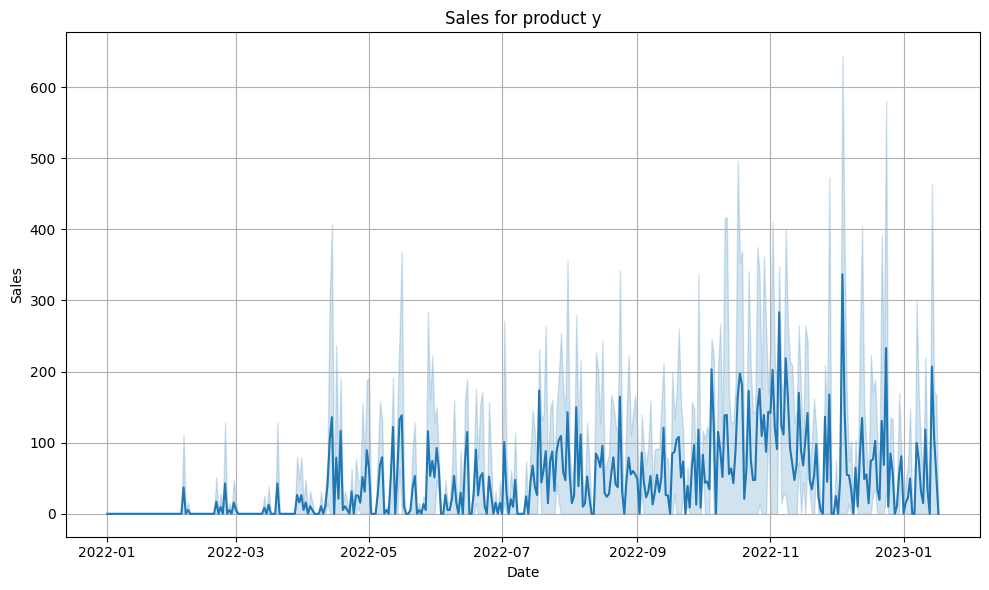

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1374355397.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_fwz')


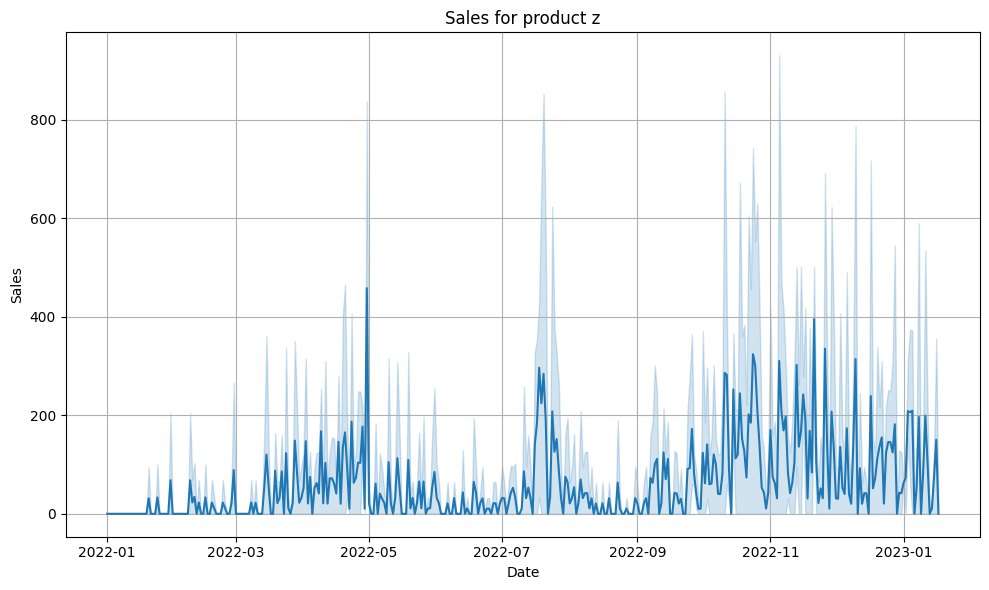

In [176]:
mask = (Sales_data_reindex['level_2'] >= '2022-01-01') & (Sales_data_reindex['level_2'] <= '2023-12-31') #2022-04-01''2021-03-31'
DF = Sales_data_reindex[mask]
for product_name in DF['product_name'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_fwz')
    plt.title(f'Sales for {product_name}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1047927686.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_interpo')


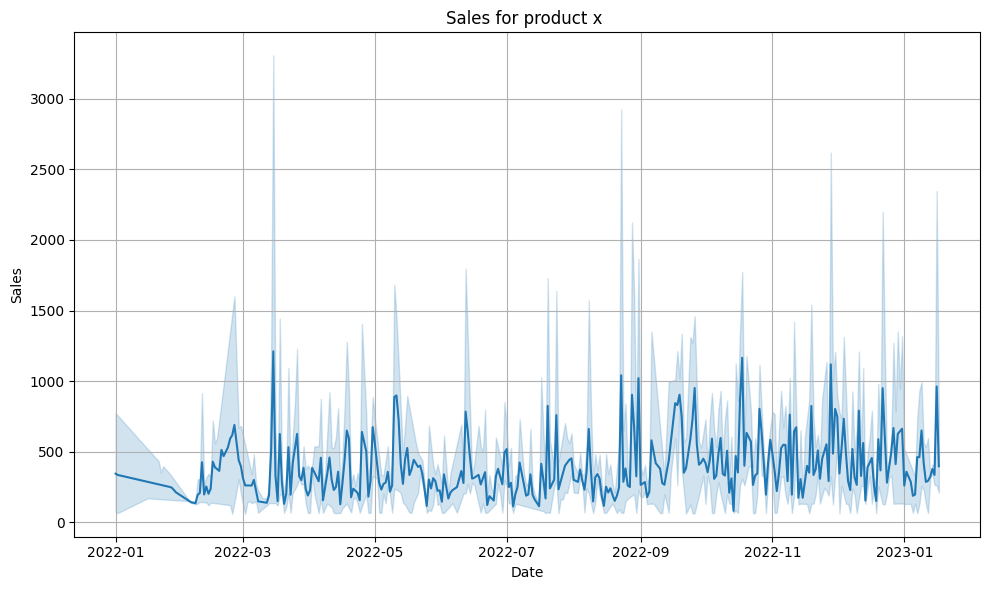

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1047927686.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_interpo')


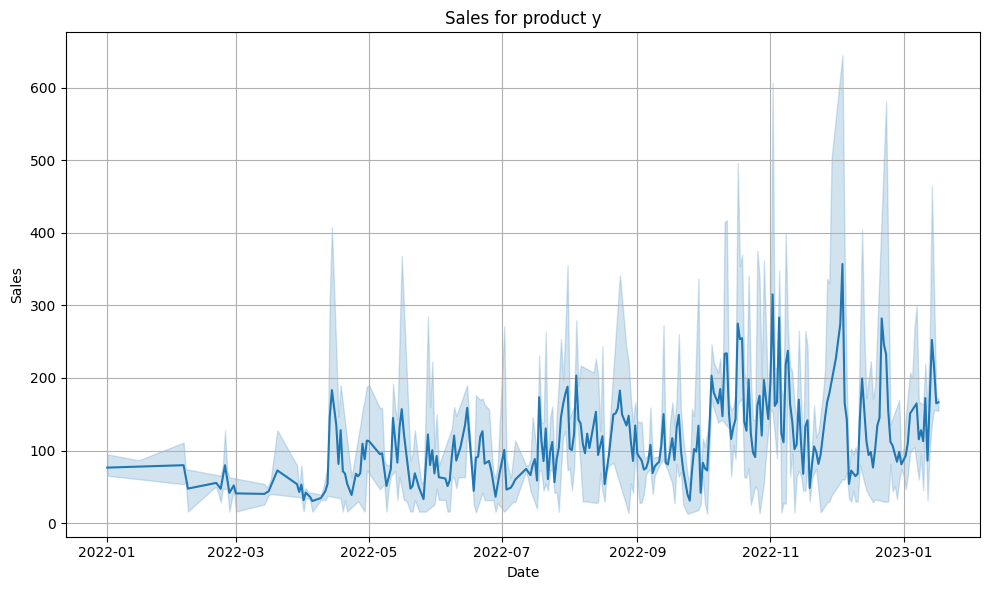

C:\Users\Noorhan.S\AppData\Local\Temp\ipykernel_1772\1047927686.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_interpo')


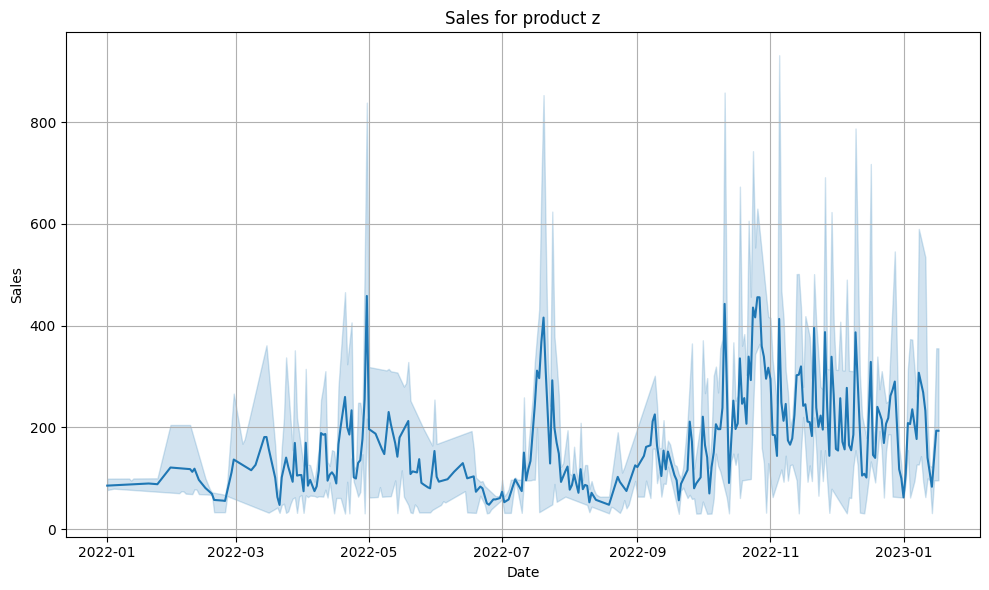

In [177]:
mask = (Sales_data_reindex['level_2'] >= '2022-01-01') & (Sales_data_reindex['level_2'] <= '2023-12-31') #2022-04-01''2021-03-31'
DF = Sales_data_reindex[mask]
for product_name in DF['product_name'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=DF[Sales_data_reindex['product_name'] == product_name], x='level_2', y='sales_interpo')
    plt.title(f'Sales for {product_name}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## Take Data in 2022

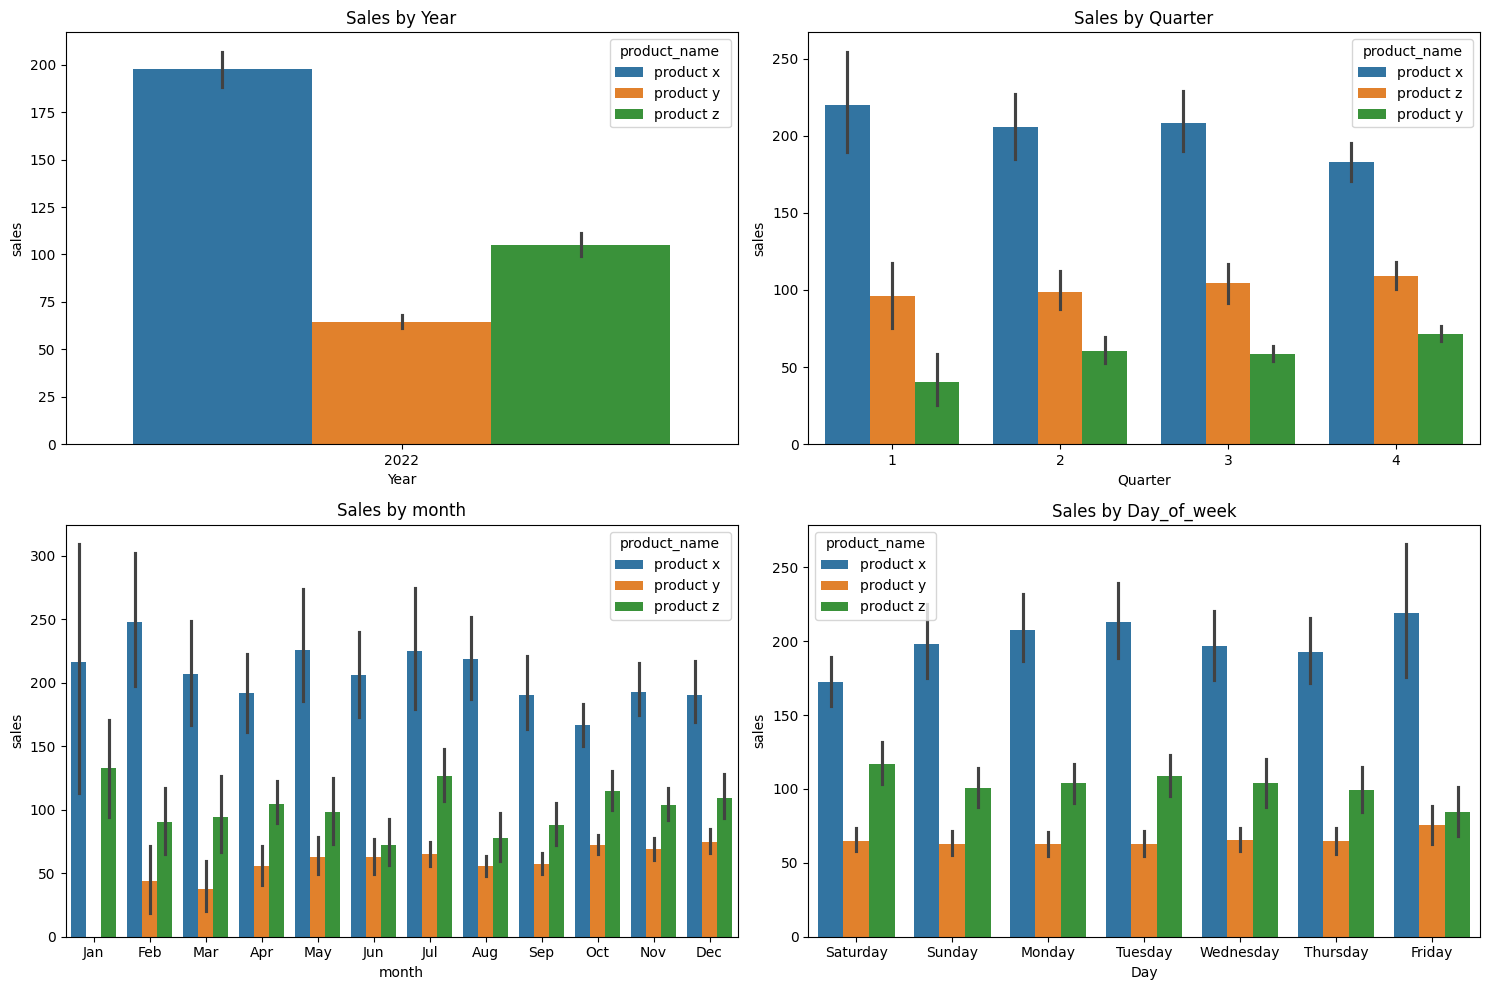

In [178]:
#Create a grid of bar charts
DF=df_1[df_1['Year'].isin([2022])]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='Year',y="sales", hue='product_name',data=DF, ax=axes[0, 0])
sns.barplot(x='Quarter',y="sales", hue='product_name', data=DF, ax=axes[0, 1])
order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='month',y="sales", hue='product_name', data=DF, ax=axes[1, 0],order=order)
order_days=[ 'Saturday', 'Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday']
sns.barplot(x='Day',y="sales", hue='product_name', data=DF, ax=axes[1, 1],order=order_days)

# Set the titles for each chart
axes[0, 0].set_title('Sales by Year')
axes[0, 1].set_title('Sales by Quarter')
axes[1, 0].set_title('Sales by month')
axes[1, 1].set_title('Sales by Day_of_week')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of bar charts
plt.show()

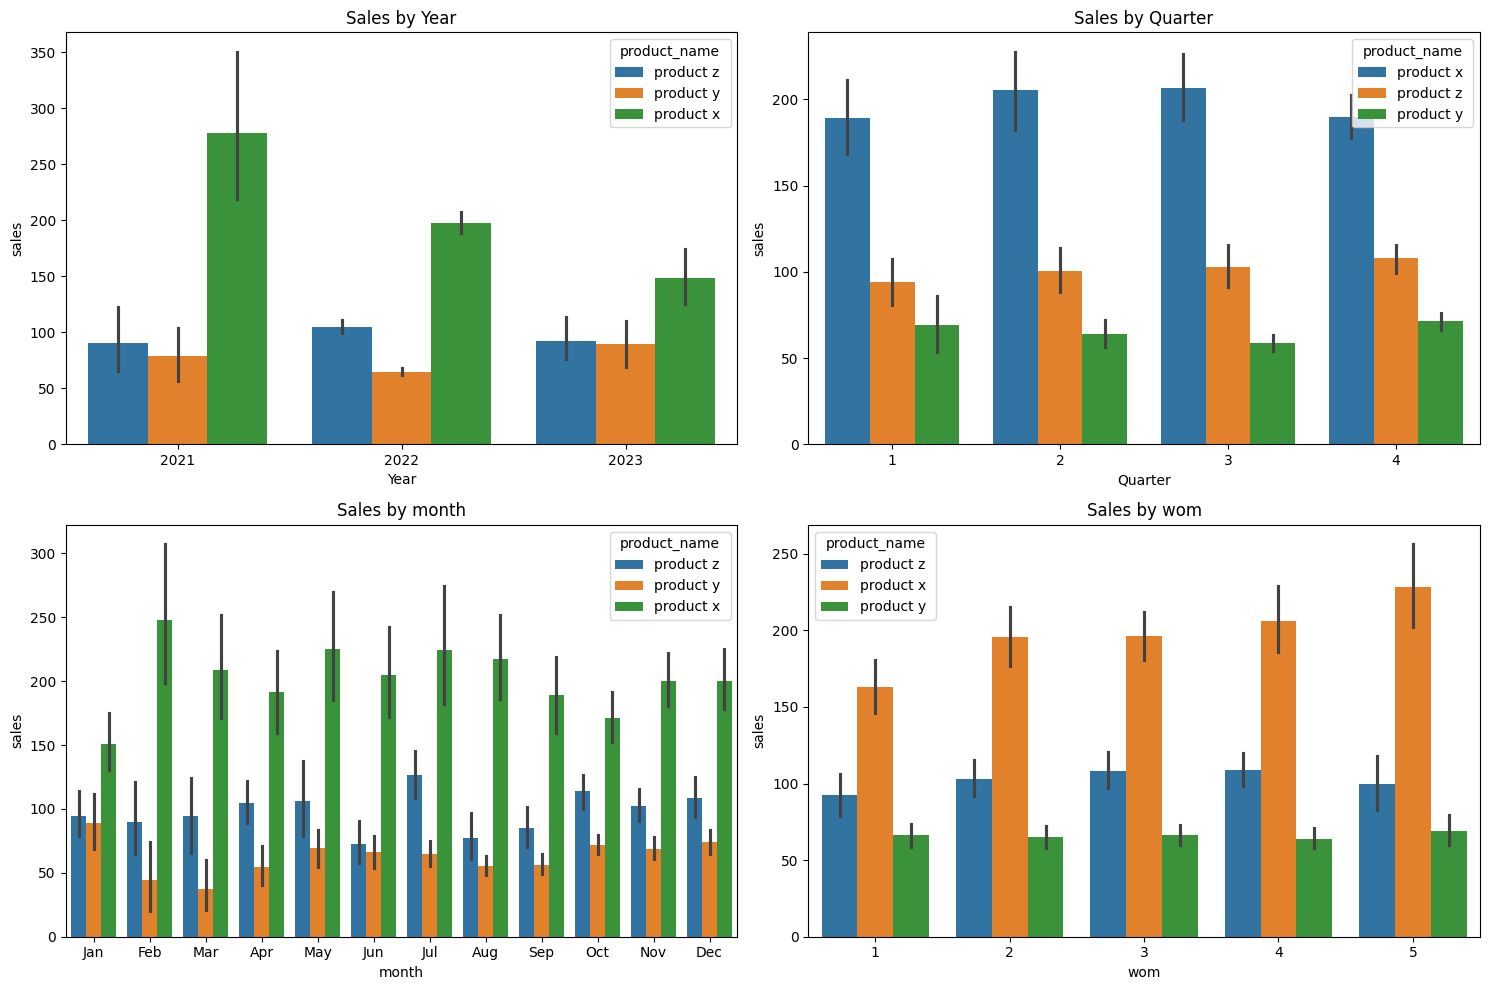

In [179]:
#Create a grid of bar charts
#DF=df_1[df_1['Year']==2022]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='Year',y="sales", hue='product_name',data=df_1, ax=axes[0, 0])
sns.barplot(x='Quarter',y="sales", hue='product_name', data=df_1, ax=axes[0, 1])
order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='month',y="sales", hue='product_name', data=df_1, ax=axes[1, 0],order=order)
sns.barplot(x='wom',y="sales", hue='product_name', data=df_1, ax=axes[1, 1])

# Set the titles for each chart
axes[0, 0].set_title('Sales by Year')
axes[0, 1].set_title('Sales by Quarter')
axes[1, 0].set_title('Sales by month')
axes[1, 1].set_title('Sales by wom')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of bar charts
plt.show()

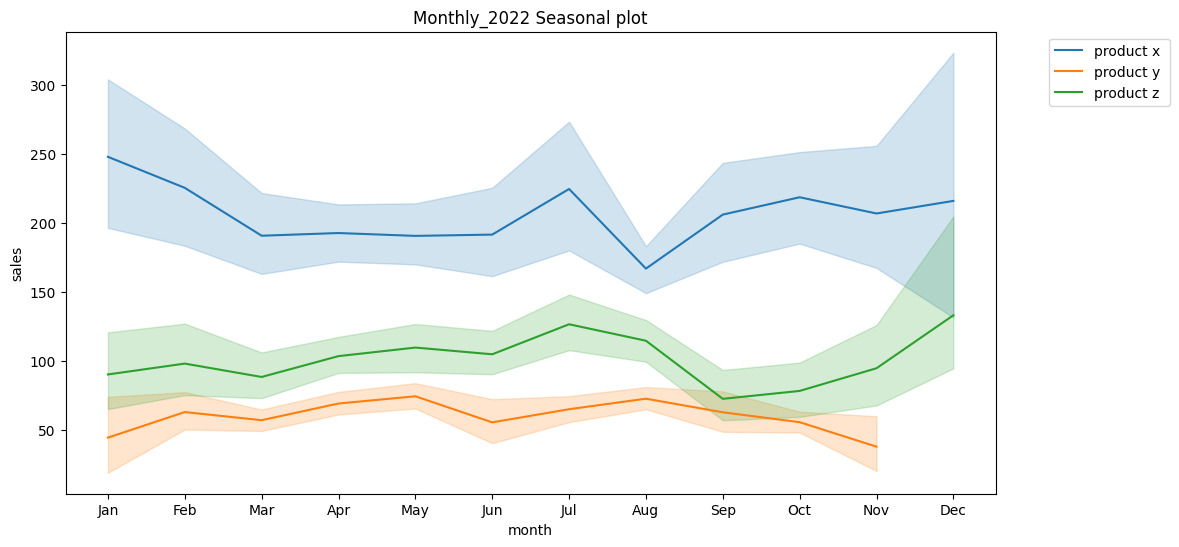

In [180]:
def monthly_quarter_line_plot(df, col_x, col_y, hue_col, title="Monthly"):
    order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df,
                 x=col_x,
                 y=col_y,
                 hue=hue_col,
                 legend='full',
                 palette="tab10",
                 )  # Ensure the order is not sorted automatically
    
    # Set the x-axis order
    plt.xticks(ticks=range(len(order)), labels=order)
    
    # Add title
    plt.title(title + ' Seasonal plot')
    
    # Move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    plt.show()


DF=df_1[df_1['Year']==2022] 
monthly_quarter_line_plot(DF, "month", "sales", "product_name", title="Monthly_2022")  # for 2022


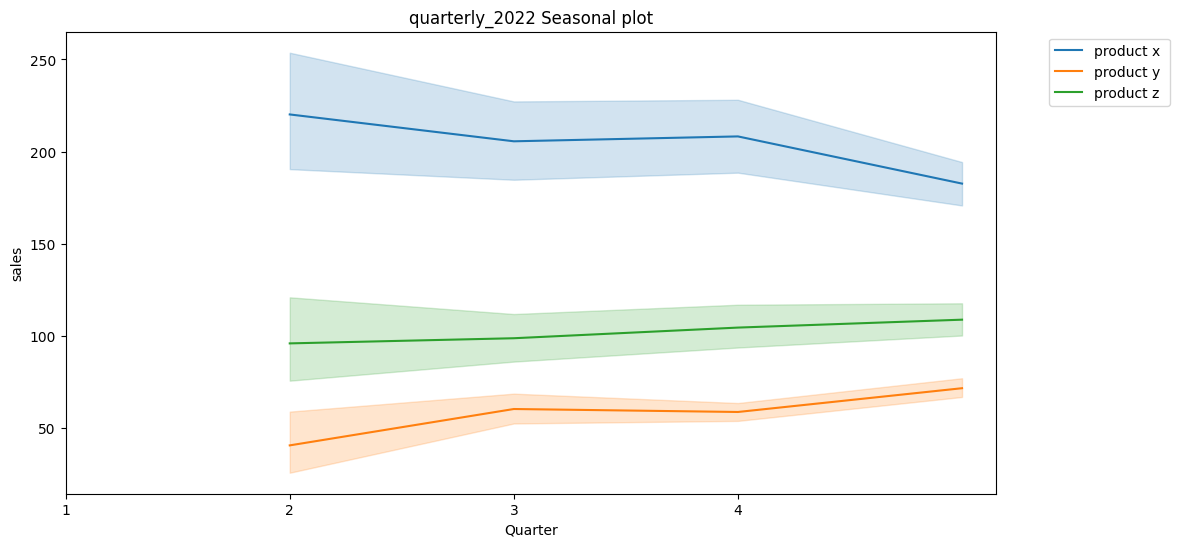

In [181]:
def monthly_quarter_line_plot(df, col_x, col_y, hue_col, title="quarterly"):
    order = [1,2,3,4]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df,
                 x=col_x,
                 y=col_y,
                 hue=hue_col,
                 legend='full',
                 palette="tab10",
                 )     
    # Set the x-axis order
    plt.xticks(ticks=range(len(order)), labels=order)
    
    # Add title
    plt.title(title + ' Seasonal plot')
    
    # Move the legend outside of the main figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    plt.show()


DF=df_1[df_1['Year']==2022] 
monthly_quarter_line_plot(DF, "Quarter", "sales", "product_name", title="quarterly_2022")  # for 2022


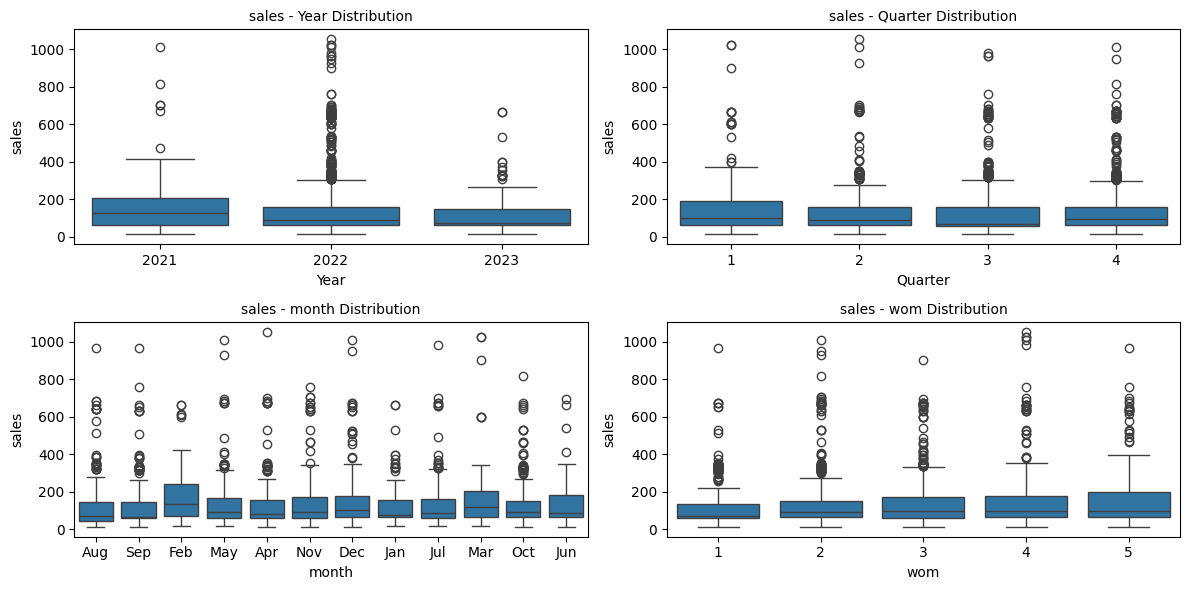

In [182]:
def draw_seasonal_box_plots(df, col_name):
  # Create the figure with 2 rows and 2 columns
  fig, axes = plt.subplots(2, 2, figsize=(12, 6))
  
  # Define time periods for x-axis labels
  time_periods = ['Year', 'Quarter', 'month', 'wom']

  # Create box plots for each time period
  for i in range(2):
    for j in range(2):
      row_index = i
      col_index = j
      time_period = time_periods[i * 2 + j]  # Access time period based on index

      sns.boxplot(x=time_period, y=col_name, data=df, ax=axes[row_index, col_index])
      axes[row_index, col_index].set_title(f'{col_name} - {time_period} Distribution', fontsize=10)

  # Adjust layout and display
  plt.tight_layout()
  plt.show()


draw_seasonal_box_plots(df_1,"sales")

<Figure size 2000x1000 with 0 Axes>

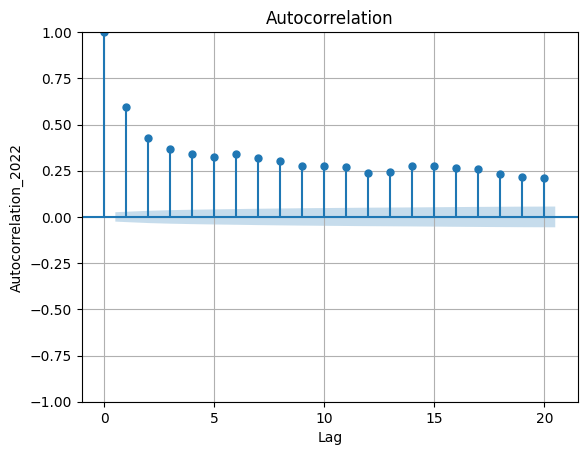

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(20, 10))
plot_acf(Sales_data_reindex['sales_ff'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation_2022')
plt.grid(True)
plt.show()



In [86]:
Sales_data_reindex['product_name'].unique()

array(['product x ', 'product y', 'product z'], dtype=object)

<Figure size 2000x1000 with 0 Axes>

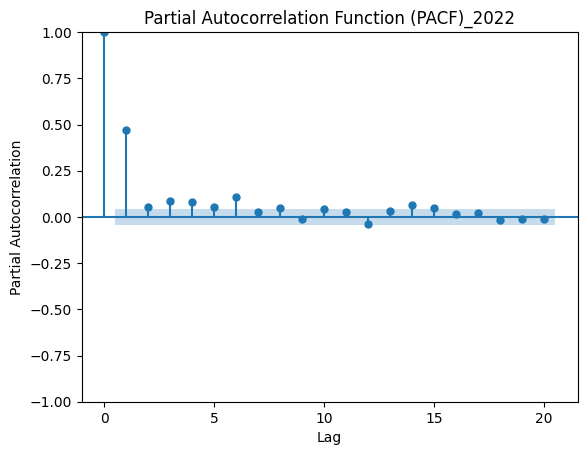

In [87]:
plt.figure(figsize=(20, 10))
plot_pacf(Sales_data_reindex[Sales_data_reindex['product_name']=='product x ']['sales_ff'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)_2022')
plt.show()

## Get training and testing set¶

In [295]:
df_grouped = df[df['Year']>2021].groupby(['product_name', 'city', 'Date_modified']).agg({'sales': 'sum'})
df_grouped.reset_index(inplace=True)
df_grouped.sort_values(by=['product_name', 'city', 'Date_modified'])
df_grouped.set_index('Date_modified', inplace=True)

In [ ]:
x=df_grouped[(df_grouped['product_name']=='product y') &(df_grouped['city']=='Cairo')]
x.set_index('Date_modified',inplace=True)
y=x[['sales']]
y.resample('D').ffill() #or interpolation

In [296]:
df_grouped[['sales']]

,sales
Date_modified,
2022-02-15 11:13:55,138.60
2022-02-23 06:21:57,122.06
2022-02-24 09:41:18,183.09
2022-02-24 11:01:14,136.62
2022-02-27 06:07:10,136.62
...,...
2023-01-12 10:17:26,62.10
2023-01-14 21:53:03,31.50
2023-01-16 10:15:48,259.20


In [297]:
df['Date_modified'] = df['Date_modified'].dt.tz_localize(None)
dff=df[['Date_modified' , 'sales']].set_index('Date_modified')
train_data = df_grouped[df_grouped.index <= pd.to_datetime('2022-11-01')]
test_data = df_grouped[df_grouped.index > pd.to_datetime('2022-11-01')]

### SARIMA

In [274]:
# Run auto_arima to find the best model
auto_model = pm.auto_arima(train_data['sales'], 
                           seasonal=True, 
                           m=12,  # assuming monthly data
                           trace=True, 
                           error_action='ignore', 
                           suppress_warnings=True, 
                           stepwise=True)

# Output the summary of the best model found
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=38816.826, Time=13.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=40691.708, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=39885.608, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=38822.796, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=40689.708, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=38822.669, Time=11.12 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=38816.519, Time=11.23 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=38815.935, Time=4.64 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=38817.454, Time=2.46 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=38828.487, Time=2.53 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=38815.377, Time=5.39 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=38825.775, Time=13.08 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=38826.179, Time=11.79 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=13.38 sec
 ARIM

In [300]:
df_grouped['sales'].index = pd.to_datetime(df_grouped['sales'].index)

In [301]:
order = auto_model.order
seasonal_order = auto_model.seasonal_order

# Fit the best model
best_model = SARIMAX(df_grouped['sales'], order=order, seasonal_order=seasonal_order)
results = best_model.fit()

# Make forecasts
forecast = results.forecast(steps=15)

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:

In [287]:
from_=pd.to_datetime('2023-01-17')
to_= pd.to_datetime('2023-01-31')
date_range=pd.date_range(start=from_ , end=to_)
date_range

DatetimeIndex(['2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [290]:
predictions = pd.Series(forecast, index=date_range)
print(predictions)

2023-01-17   NaN
2023-01-18   NaN
2023-01-19   NaN
2023-01-20   NaN
2023-01-21   NaN
2023-01-22   NaN
2023-01-23   NaN
2023-01-24   NaN
2023-01-25   NaN
2023-01-26   NaN
2023-01-27   NaN
2023-01-28   NaN
2023-01-29   NaN
2023-01-30   NaN
2023-01-31   NaN
Freq: D, Name: predicted_mean, dtype: float64


In [302]:
df_grouped = df.groupby(['product_name', 'city', 'Date_modified']).agg({'sales': 'sum'})
df_grouped.reset_index(inplace=True)
df_grouped.set_index('Date_modified')

df_grouped.sort_values(by=['product_name', 'city', 'Date_modified'])
df_grouped.rename(columns={'Date_modified': 'ds', 'sales': 'y'}, inplace=True)
df_grouped['ds'] = pd.to_datetime(df_grouped['ds']).dt.tz_localize(None)

grouped_df = df_grouped.groupby(['product_name', 'city'])

# Create a list to store forecasts
forecasts = []
#grouped_df.columns = ['product_name','city','ds', 'y']
#grouped_df.rename(columns={'Date_modified': 'ds', 'sales': 'y'}, inplace=True)
# Iterate over each group and forecast
for name, group in grouped_df:
    print (name)
    model = SARIMAX(group['y'], order=auto_model.order, seasonal_order=auto_model.seasonal_order)
    results = model.fit()

    # Make future forecasts
    future_forecast = results.get_forecast(steps=15)
    forecast = future_forecast.predicted_mean

    # Append the forecasts to a list or DataFrame
    forecasts.append(forecast)

# Concatenate the forecasts
all_forecasts = pd.concat(forecasts)


('product x ', 'Cairo')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


('product x ', 'Giza')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product x ', 'North')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product y', 'Cairo')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product y', 'Giza')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product y', 'North')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product z', 'Cairo')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product z', 'Giza')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\

('product z', 'North')


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [307]:
all_forecasts.values

array([243.61948553, 261.7199475 , 255.87196115, 258.72624329,
       246.57989119, 262.98231311, 256.93494074, 255.19844919,
       249.73430166, 262.54814415, 255.70118322, 253.55826111,
       253.06019901, 262.25505612, 254.39600624, 185.92819605,
       222.78014191, 161.39263818, 208.32927618, 171.72907355,
       211.56387359, 179.09021189, 218.93143332, 189.85135609,
       197.71565466, 191.88210784, 202.6932747 , 198.08341503,
       203.0825093 , 196.2417758 , 153.76681196, 159.83781345,
       162.29444253, 161.85809668, 169.60149924, 160.45827562,
       151.08191066, 157.73447622, 158.39357396, 157.07620083,
       155.22671526, 156.93867672, 154.21532681, 154.21247823,
       158.71339736,  73.40570226, 119.79891981, 159.43521852,
        88.38356748, 169.70433825,  83.93940465,  77.04817028,
        88.07302695, 167.97793865, 101.24507376, 147.46836526,
        99.80161026, 131.42005316, 121.41878562, 106.59080033,
       120.35476268, 181.99824183, 241.83084772, 140.28

# prophet

In [292]:
df_grouped = df.groupby(['product_name', 'city', 'Date_modified']).agg({'sales': 'sum'})
df_grouped.reset_index(inplace=True)
df_grouped.set_index('Date_modified')

df_grouped.sort_values(by=['product_name', 'city', 'Date_modified'])
df_grouped.rename(columns={'Date_modified': 'ds', 'sales': 'y'}, inplace=True)
df_grouped['ds'] = pd.to_datetime(df_grouped['ds']).dt.tz_localize(None)

grouped_df = df_grouped.groupby(['product_name', 'city'])

# Create a list to store forecasts
forecasts = []
#grouped_df.columns = ['product_name','city','ds', 'y']
#grouped_df.rename(columns={'Date_modified': 'ds', 'sales': 'y'}, inplace=True)
# Iterate over each group and forecast
for name, group in grouped_df:
    print (name)
    model = Prophet()
    model.fit(group.reset_index())

    future_df = model.make_future_dataframe(periods=10)
    forecast = model.predict(future_df)

    forecasts.append(forecast)

# Concatenate the forecasts
all_forecasts = pd.concat(forecasts)


('product x ', 'Cairo')


22:47:32 - cmdstanpy - INFO - Chain [1] start processing
22:47:33 - cmdstanpy - INFO - Chain [1] done processing


('product x ', 'Giza')


22:47:33 - cmdstanpy - INFO - Chain [1] start processing
22:47:33 - cmdstanpy - INFO - Chain [1] done processing


('product x ', 'North')


22:47:34 - cmdstanpy - INFO - Chain [1] start processing
22:47:34 - cmdstanpy - INFO - Chain [1] done processing
22:47:34 - cmdstanpy - INFO - Chain [1] start processing


('product y', 'Cairo')


22:47:35 - cmdstanpy - INFO - Chain [1] done processing


('product y', 'Giza')


22:47:35 - cmdstanpy - INFO - Chain [1] start processing
22:47:35 - cmdstanpy - INFO - Chain [1] done processing


('product y', 'North')


22:47:36 - cmdstanpy - INFO - Chain [1] start processing
22:47:36 - cmdstanpy - INFO - Chain [1] done processing


('product z', 'Cairo')


22:47:36 - cmdstanpy - INFO - Chain [1] start processing
22:47:36 - cmdstanpy - INFO - Chain [1] done processing


('product z', 'Giza')


22:47:37 - cmdstanpy - INFO - Chain [1] start processing
22:47:37 - cmdstanpy - INFO - Chain [1] done processing


('product z', 'North')


22:47:37 - cmdstanpy - INFO - Chain [1] start processing
22:47:38 - cmdstanpy - INFO - Chain [1] done processing


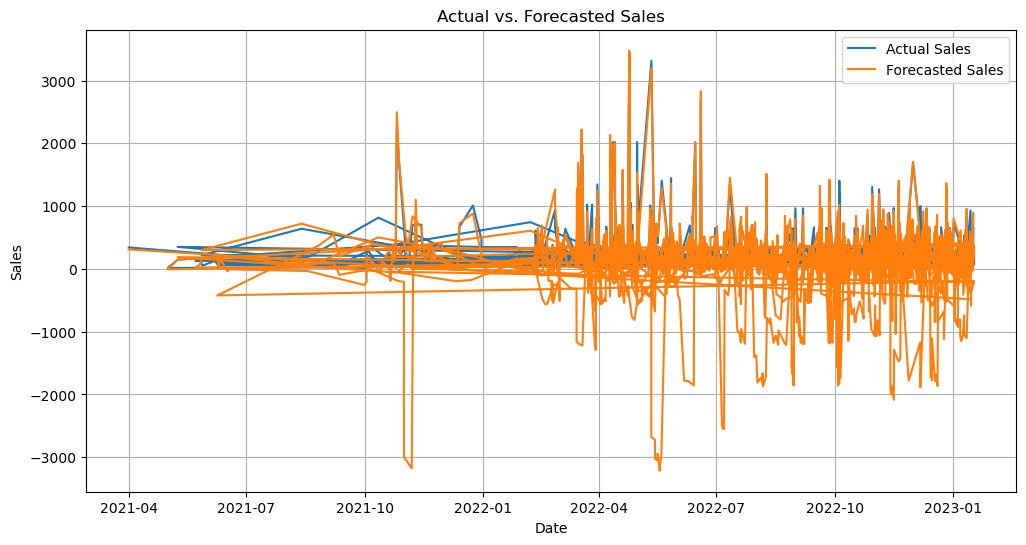

In [293]:
residual=all_forecasts["yhat"]-df_grouped['y']
residual.values
df_grouped['resd']=pd.Series(residual.values)
df_grouped["yhat"]=df_grouped['y']+df_grouped['resd']
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['ds'], df_grouped['y'], label='Actual Sales')
plt.plot(df_grouped['ds'], df_grouped['yhat'], label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()

# ML modling

In [195]:
#data_fram=df[['product_name','city','Year','month','Week','Day','sales','Date_modified']].set_index('Date_modified')
data_fram=df[['product_name','city','Year','month','Week','Day','sales','Date_modified']]
data_fram.sort_index(inplace=True)
data_fram

,product_name,city,Year,month,Week,Day,sales,Date_modified
0,product y,North,2021,Oct,43,Friday,422.40,2021-10-29 03:33:52+00:00
1,product y,Cairo,2021,Oct,42,Saturday,384.00,2021-10-23 12:29:27+00:00
2,product z,North,2021,Aug,31,Tuesday,63.00,2021-08-03 09:14:16+00:00
3,product y,North,2021,Aug,33,Tuesday,46.56,2021-08-17 09:00:50+00:00
4,product z,North,2021,Sep,36,Monday,32.85,2021-09-06 19:57:02+00:00
...,...,...,...,...,...,...,...,...
2976,product x,Giza,2022,Dec,49,Monday,132.66,2022-12-05 09:48:42+00:00
2977,product x,Giza,2022,Dec,51,Wednesday,132.66,2022-12-21 00:00:28+00:00
2978,product z,Giza,2022,Dec,52,Tuesday,155.25,2022-12-27 08:43:38+00:00
2979,product x,North,2022,Nov,47,Saturday,67.32,2022-11-26 09:16:45+00:00


### Encoding 

In [196]:
Encoder = OneHotEncoder(sparse=False , drop='first')#one hot encoder
encoded_data = Encoder.fit_transform(data_fram[['product_name', 'city', 'Year', 'month', 'Week', 'Day']])
encoded_data_Df = pd.DataFrame(encoded_data , columns= Encoder.get_feature_names_out())
df = pd.concat([data_fram,encoded_data_Df] , axis = 1 )
df.drop(['product_name', 'city', 'Year', 'month', 'Week', 'Day'] , axis = 1 , inplace =True)
df.set_index("Date_modified", inplace=True)
df.sort_index(ascending=True)

### train_test_split

In [208]:
train_data = df[df.index <= '2022-11-01']
test_data = df[df.index > '2022-11-01']
x_train=train_data.drop(['sales'] , axis=1)
y_train=train_data['sales']

x_test=test_data.drop(['sales'] , axis=1)
y_test=test_data['sales']


In [211]:
#Model selection & evaluation
models= list()
models.append(('LR', LinearRegression()))
models.append (('DT', DecisionTreeRegressor(max_depth=6 , max_leaf_nodes=10 , max_features=5)))
models.append(('SVR', SVR(kernel='sigmoid',degree=5)))
models. append(('XGB', XGBRegressor(n_estimators=80)))

for model in models:
    steps = list()
    steps.append(('scaler', RobustScaler()))
    steps.append(model)
    pipeline= Pipeline(steps= steps)
    pipeline.fit(x_train , y_train)
    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)
    print(model[0])
    print("r2 train is " ,r2_score(y_train , y_train_pred) )
    print("r2 test is " ,r2_score(y_test , y_test_pred) )
    print('_'*50)



LR
r2 train is  0.1550169588712803
r2 test is  -6.937155180765647e+22
__________________________________________________
DT
r2 train is  0.054838828658361094
r2 test is  -1.1462338932619156
__________________________________________________
SVR
r2 train is  -0.038424389682137905
r2 test is  -0.047234207836378994
__________________________________________________
XGB
r2 train is  0.5618165053562753
r2 test is  -0.8664834804811954
__________________________________________________
